In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
path = '../../0-DATA/weather.csv'

In [11]:
# data preparation
def dataprep():
    dataset = pd.read_csv(path, parse_dates=True, index_col=0)
    header = ['Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'RainTomorrow']
    df = dataset[header]
    dataset_clean = df.dropna()
    X = dataset_clean[header[:3]]
    y = dataset_clean[header[3]]
    y = np.array([0 if value == 'No' else 1 for value in y])
    return X, y

dataset = dataprep()
X = dataset[0]
y = dataset[1]

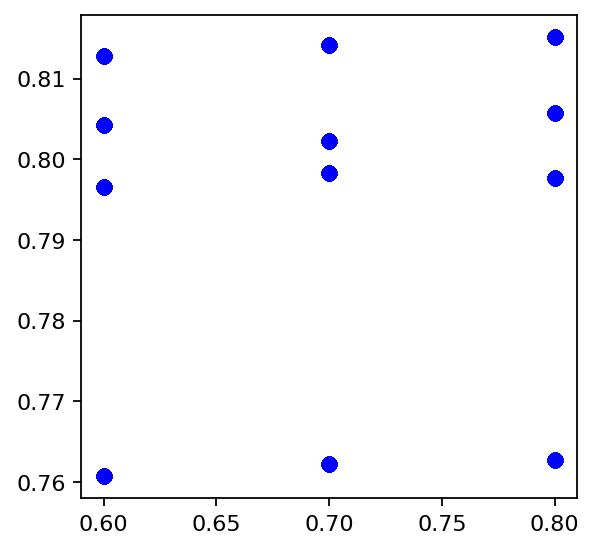

In [129]:
rfig = plt.figure(figsize=(4,4),dpi=160)
k_range = range(1,5)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    
    t = [0.8, 0.7, 0.6]
    
    for s in t:
        scores = []
        for i in range(1,100):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
            knn.fit(X_train, y_train)
            scores.append(knn.score(X_test, y_test))
        
        for i in range(len(scores)):
            plt.plot(s, np.mean(scores), 'bo')